<a href="https://colab.research.google.com/github/kai-v/BayerPatternInterpolation/blob/master/Demosaicing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp
import PIL as pl
import cv2

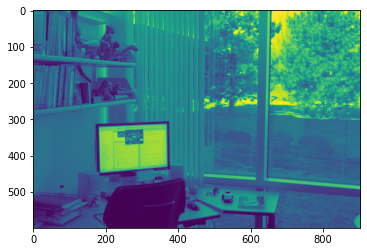

In [ ]:
image_path = "/media/officeBayer.png"
f1 = mp.imread(image_path)
%matplotlib inline
plt.imshow(f1)
# 2. 
f2.show()

In [ ]:
[r,c] = f1.shape
print("rows: {0}, cols: {1}".format(r,c))
print("#of elements:" + str(f1.size))

rows: 600, cols: 903
#of elements:541800


In [ ]:
np_img = np.array(image_path)
print(np_img.shape)

ind = f1[:,:];
#print(ind) 
row = f1[0,:]; 
print("row: {0}".format(row))
col = f1[:,0]; 
#print("col: {0}".format(col))

Bilinear Interpolation 

In [197]:
#Numy arrays for R,G,B channels 
Red = np.zeros([600,903])
Blue = np.zeros([600,903])
Green = np.zeros([600,903])


Getting the individual R,B,G channels , leveraging the BGGR pattern 

In [202]:

for i in range(600):
  for j in range(903):
    #odd index
    if i%2 == 1 and j%2 == 1:
     Red[i,j] = f1[i,j]*255
 
     
     #Even index
    elif (i%2 == 0 and j%2 == 0):
     Blue[i,j] = f1[i,j]*255
   
    
    else:
     Green[i,j] = f1[i,j]*255
    
#Make copies of the numpy arrays
Green_interpolated = np.copy(Green)
Red_interpolated = np.copy(Red)
Blue_interpolated = np.copy(Blue)


Pad the Red, Blue and Green images with 0's 

In [203]:
Red = np.pad(Red,((2,2),(2,2)),mode='constant') 
Blue = np.pad(Blue,((2,2),(2,2)),mode='constant')
Green = np.pad(Green,((2,2),(2,2)),mode='constant')         

Using Bilinear Interpolation

In [205]:

for i in range(600):
  for j in range(903):
    Green_interpolated[i,j] = (1/4)*(Green[i,j-1] + Green[i,j+1] + Green[i - 1,j] + Green[i + 1,j])*(1/255)

#Calculated in a cross pattern 
for i in range(600):  
  for j in range(903):
    Red_interpolated[i,j] = (1/4)*(Red[i + 1,j + 1] + Red[i - 1,j - 1] + Red[i - 1,j + 1] + Red[i + 1,j - 1])*(1/255)
    Blue_interpolated[i,j] = (1/4)*(Blue[i + 1,j + 1] + Blue[i - 1,j - 1] + Blue[i - 1,j + 1] + Blue[i + 1,j - 1])*(1/255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


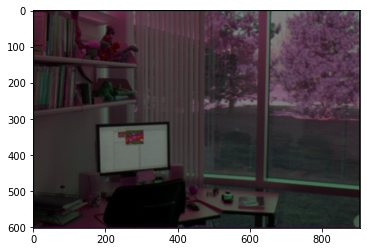

In [209]:
#Stack the R,G,B channels on to of each other 
finalImage = np.dstack((Red_interpolated,Blue_interpolated,Green_interpolated))
plt.imshow(finalImage)

Now using the proposed algorithm in the paper

In [208]:
#Make copies of the original R,B,G arrays 

Green_interpolated2 = np.copy(Green)
Red_interpolated2 = np.copy(Red)
Blue_interpolated2 = np.copy(Blue)

#We define the constants Alpha , Beta , Gamma as given in the paper

alpha = 1/2
beta = 5/8
gamma = 3/4

Since we calculated the bilinearly interpolated values above , we only need to find the gradient values 

In [ ]:
#Green
for i in range(600):
  for j in range(903):
    Delta_R[i,j] = Red[i,j] - (1/4)*


#Red
for i in range(600):
  for j in range(903):



#Blue
for i in range(600):
  for j in range(903):
